# Piedra Papel Tijera Infection



<center>
<img src="https://safetybox.co.uk/pub/media/catalog/product/cache/1/170x170/biohazard-symbol-labels.png" width=250 height=250 />
</center>

## Reglas



### Para Papel

-Si el papel es igual a piedra y tijera se queda igual.

-Si hay mas piedras que papeles y tijeras, el papel se convierte en piedra.

-En cualquier otro caso el papel se convierte en tijera.

Tanto para piedra y tijeras, las mismas reglas aplican, solamente cambiando los estados. En pocas palabras, el agente siempre tomara el estado, de la mayoria a su alrededor.


In [ ]:
!python3 -m pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Imports



In [2]:
# 'Model' sirve para definir los atributos a nivel del modelo, maneja los agentes
# 'Agent' es la unidad atómica y puede ser contenido en múltiples instancias en los modelos
from mesa import Agent, Model

# 'SingleGrid' sirve para forzar a un solo objeto por celda (nuestro objetivo en este "juego")
from mesa.space import SingleGrid

# 'SimultaneousActivation' habilita la opción de activar todos los agentes de manera simultanea.
from mesa.time import SimultaneousActivation

# 'DataCollector' permite obtener el grid completo a cada paso (o generación), útil para visualizar
from mesa.datacollection import DataCollector

# 'matplotlib' lo usamos para graficar/visualizar como evoluciona el autómata celular.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
mlp.rcParams['animation.embed_limit'] = 2**128

# Definimos los siguientes paquetes para manejar valores númericos: 'numpy' & 'pandas'
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

import random

## Crear el modelo



In [3]:
class GameLifeAgent(Agent):
    """
    Representa a un agente o una celda con estado vivo (1) o muerto (0)
    """
    def __init__(self, unique_id, model):
        """
        Crea un agente con estado inicial aleatorio de 0 ó 1, también se le asigna un identificador
        formado por una tupla (x,y). Se define un nuevo estado cuyo valor será definido por las
        reglas mencionadas arriba.
        Estados:
        0-Papel
        1-Piedra
        2-Tijera
        """
        super().__init__(unique_id, model)
        self.estado = np.random.choice([0,1,2])
        self.next_state = None

    def step(self):
        """
        Este método es el que calcula si la celda vivirá o morirá dependiendo el estado de sus vecinos.
        Esta es la dinámica principal del juego de la vida. Por lo tanto, el estado live de la
        siguiente generación no se cambia aquí, solo se almacena en self.next_state. La idea consiste
        en esperar a que todos los agentes calculen su estado y una vez hecho esto, hacer el cambio.

        Modificaciones

        Se deben hacer cambios para piedra,papel o tijera


        """


        'Se revisan los vecinos, se da la posicion del agente, si se incluyen esquinas, y si se toma en cuenta el centro'
        neighbours = self.model.grid.get_neighbors(
            self.pos,
            moore=True,
            include_center=False)

        
        piedra = 0
        papel = 0
        tijera = 0

        for neighbor in neighbours:
            if neighbor.estado == 0:
              papel = papel + 1
            if neighbor.estado == 1:
              piedra = piedra + 1
            if neighbor.estado == 2:
              tijera = tijera + 1

        self.next_state = self.estado

        
        
        if self.next_state == 0:
            if (papel > piedra and papel > tijera) or (papel == piedra and papel == tijera):
                self.next_state = 0
            elif piedra > papel and piedra > tijera:
                self.next_state = 1
            else:
                self.next_state = 2
        elif self.next_state == 1:
            if (piedra > papel and piedra > tijera) or (papel == piedra and piedra == tijera):
                self.next_state = 1
            elif tijera > papel and tijera > piedra:
                self.next_state = 2
            else:
                self.next_state = 0
        else:  
            if (tijera > papel and tijera > piedra) or (papel == piedra and piedra == tijera):
                self.next_state = 2
            elif papel > piedra and papel > tijera:
                self.next_state = 0
            else:
                self.next_state = 1

                
    def advance(self):
        """
        Define el nuevo estado calculado del método step.
        """
        self.estado = self.next_state

class GameLifeModel(Model):
    """
    Define el modelo del juego de la vida.
    """
    def __init__(self, width, height):
        self.width = width
        self.height = height

        self.reset()

    def reset(self):
        self.num_agents = self.width * self.height
        self.grid = SingleGrid(self.width, self.height, True)
        self.schedule = SimultaneousActivation(self)

        # se importa arriba: import random
        # celdas = model.grid.coord_iter()
        # celdas_con_arboles = random.sample(celdas, k=25)
        # posiciones_arboles = [pos for _, pos in celdas_con_arboles]

        for (content, pos) in self.grid.coord_iter():
            # if pos in posiciones_arboles
                # código para instanciar árbol

            a = GameLifeAgent(pos, self)
            self.grid.place_agent(a, pos)
            self.schedule.add(a)

        # Aquí definimos el colector de datos para obtener el grid completo.
        self.datacollector = DataCollector(
            model_reporters={"Grid": self.get_grid,
                             "Papel":self.get_papel,
                             "Piedra":self.get_piedra,
                             "Tijera": self.get_tijera}
        )

    def step(self):
        """
        En cada paso el colector toma la información que se definió y almacena el grid para luego
        graficarlo.
        """
        self.datacollector.collect(self)
        self.schedule.step()

    def get_grid(self):
        """
        Esta es una función auxiliar que nos permite guardar el grid para cada uno de los agentes.
        :param model: El modelo del cual obtener el grid.
        :return: Matriz con la información del grid del agente.
        """

        # Generamos la grid para contener los valores
        grid = np.zeros((self.grid.width, self.grid.height))

        # Asignamos una celda a cada uno de los elementos de la grilla
        for cell in self.grid.coord_iter():
            cell_content, pos = cell
            x, y = pos
            grid[x][y] = cell_content.estado

        return grid
    
    def get_papel(self):
        total_papel = 0

        for cell in model.grid.coord_iter():
           agent, _ = cell
           if isinstance(agent, GameLifeAgent):
                
                if(agent.estado == 0):
                    total_papel = total_papel + 1
        return total_papel
                

    def get_piedra(self):
        total_piedra = 0

        for cell in model.grid.coord_iter():
           agent, _ = cell
           if isinstance(agent, GameLifeAgent):
                
                if(agent.estado == 1):
                    total_piedra = total_piedra + 1
        return total_piedra
    

    def get_tijera(self):
        total_tijera = 0

        for cell in model.grid.coord_iter():
           agent, _ = cell
           if isinstance(agent, GameLifeAgent):
                
                if(agent.estado == 2):
                    total_tijera = total_tijera + 1
        return total_tijera

   

# Ejecución del modelo
A continuación corremos el modelo

In [18]:
# Definimos el tamaño del Grid ..> 7 x 7
GRID_SIZE = 100

# Definimos el número de generaciones a correr
NUM_GENERATIONS = 500

# Registramos el tiempo de inicio y corremos el modelo
start_time = time.time()

model = GameLifeModel(GRID_SIZE, GRID_SIZE)
for i in range(NUM_GENERATIONS):
    model.step()
final_time = time.time()

# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(final_time - start_time))))

Tiempo de ejecución: 0:00:14.168021


Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.

In [19]:
all_grids = model.datacollector.get_model_vars_dataframe()

Graficamos la información usando `matplotlib`

In [20]:
all_grids

Grid  Papel  Piedra  Tijera
0    [[0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 2.0,...   3248    3357    3395
1    [[2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0,...   3237    3374    3389
2    [[1.0, 0.0, 2.0, 0.0, 1.0, 2.0, 2.0, 2.0, 0.0,...   3205    3387    3408
3    [[2.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0,...   3223    3378    3399
4    [[2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 2.0, 0.0,...   3254    3394    3352
..                                                 ...    ...     ...     ...
495  [[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...   3175    3550    3275
496  [[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   3184    3540    3276
497  [[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...   3175    3548    3277
498  [[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   3183    3540    3277
499  [[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...   3176    3549    3275

[500 rows x 4 columns]

In [21]:
%%capture

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

axs.set_xticks([])
axs.set_yticks([])

colors = []
colors.append(np.array([255 / 255, 255 / 255, 40 / 255, 1]))
colors.append(np.array([255 / 255, 80 / 255, 80 / 255, 1]))
colors.append(np.array([80 / 255, 255 / 255, 80 / 255, 1]))


colormap = mlp.colors.ListedColormap(colors)

patch_grid = axs.imshow(all_grids['Grid'].iloc[0], cmap=colormap, vmin=0, vmax=2)

estado_papel = []

estado_piedra = []

estado_tijera = []
def animate(i):
    patch_grid.set_data(all_grids['Grid'].iloc[i])

    estado_papel.append(all_grids['Papel'].iloc[i])

    estado_piedra.append(all_grids['Piedra'].iloc[i])

    estado_tijera.append(all_grids['Tijera'].iloc[i])

    

anim = animation.FuncAnimation(fig, animate, frames=NUM_GENERATIONS)

In [22]:
anim

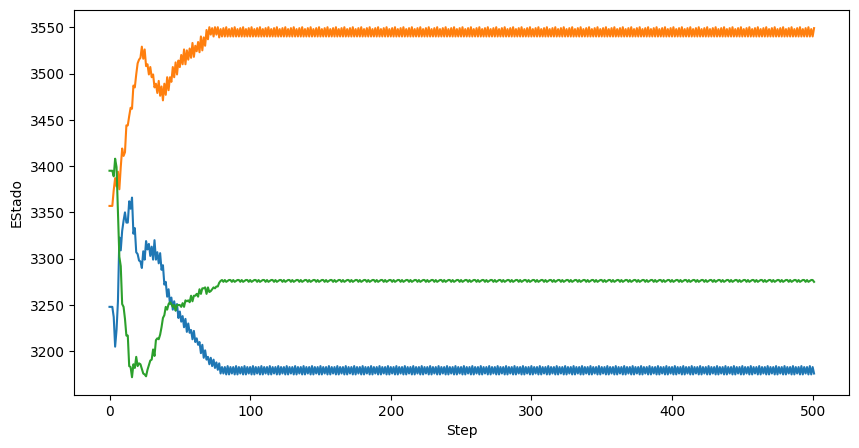

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step")
axs.set_ylabel("EStado")

plt.plot(estado_papel,label='Papel')
plt.plot(estado_piedra,label='Piedra')
plt.plot(estado_tijera,label='Tijera')
plt.show()

# Batch simulation

In [14]:
NUM_REPS = 50
GRID_SIZE = 100
NUM_GENERATIONS = 200
model = GameLifeModel(GRID_SIZE, GRID_SIZE)

batch_data = dict(time=[], papel=[],piedra=[],tijera=[])

for _ in range(NUM_REPS):
    start_time = time.time()

    model.reset()
    for i in range(NUM_GENERATIONS):
        model.step()
    final_time = time.time()

    all_grids = model.datacollector.get_model_vars_dataframe()

    batch_data['time'].append(final_time - start_time)
    batch_data['papel'].append(all_grids['Papel'].to_numpy())
    batch_data['piedra'].append(all_grids['Piedra'].to_numpy())
    batch_data['tijera'].append(all_grids['Tijera'].to_numpy())




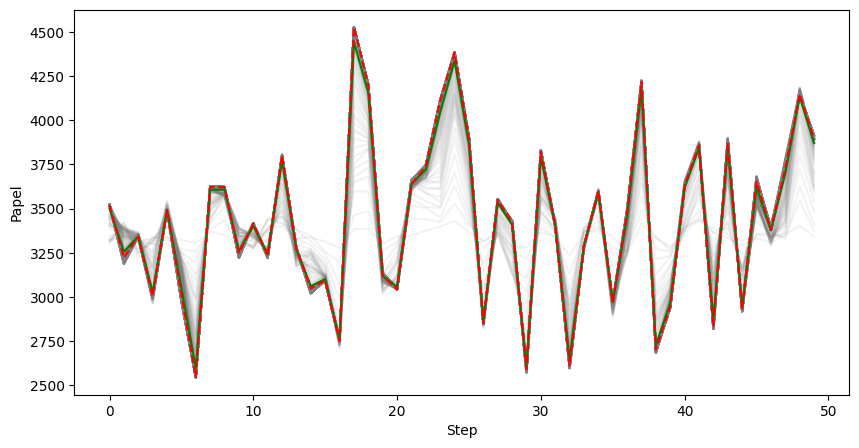

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step")
axs.set_ylabel("Papel")

#axs.set_prop_cycle('color', list(plt.cm.(np.linspace(0, 1, NUM_REPS))))
plt.plot(batch_data['papel'], color='Grey', alpha=0.1)

plt.plot(np.average(np.array(batch_data['papel']), axis=1), color='Green')
plt.plot(np.median(np.array(batch_data['papel']), axis=1), color='Red', linestyle='dashed')

plt.show()

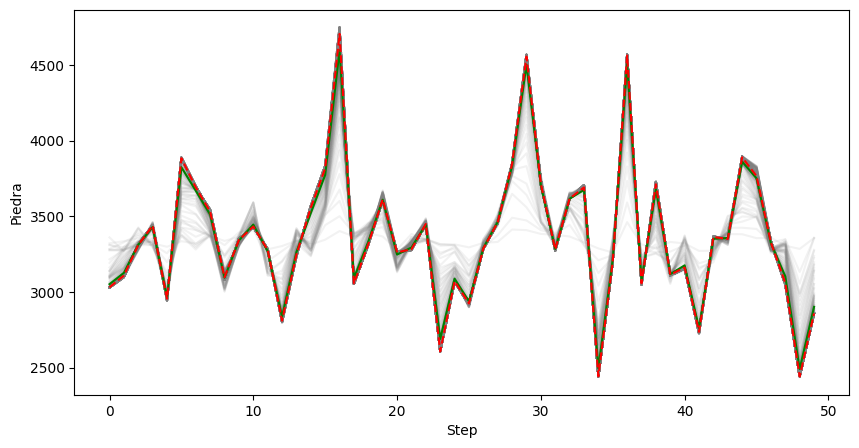

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step")
axs.set_ylabel("Piedra")

#axs.set_prop_cycle('color', list(plt.cm.(np.linspace(0, 1, NUM_REPS))))
plt.plot(batch_data['piedra'], color='Grey', alpha=0.1)

plt.plot(np.average(np.array(batch_data['piedra']), axis=1), color='Green')
plt.plot(np.median(np.array(batch_data['piedra']), axis=1), color='Red', linestyle='dashed')

plt.show()

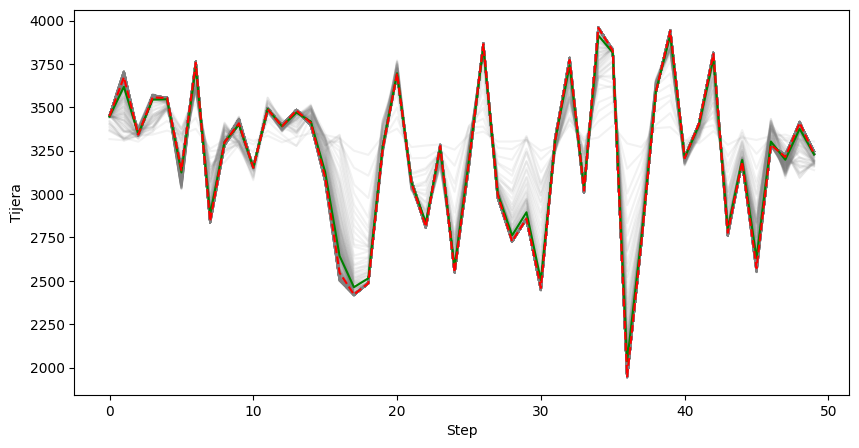

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step")
axs.set_ylabel("Tijera")

#axs.set_prop_cycle('color', list(plt.cm.(np.linspace(0, 1, NUM_REPS))))
plt.plot(batch_data['tijera'], color='Grey', alpha=0.1)

plt.plot(np.average(np.array(batch_data['tijera']), axis=1), color='Green')
plt.plot(np.median(np.array(batch_data['tijera']), axis=1), color='Red', linestyle='dashed')

plt.show()